<a href="https://colab.research.google.com/github/lcmajr/COVID-19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_excel ('Geral.xlsx')
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio']
meses1 = ['Janeiro', 'Fevereiro', 'Março', 'Abril']

Mostragem dos dados trabalhados


In [0]:
data

,Data,Recuperados,Confirmados,Mortos
0,1,0,0,0
1,2,0,2,0
2,3,127,5717,201
3,4,30152,63100,4286


In [0]:
C1=np.array(data.Confirmados.array)

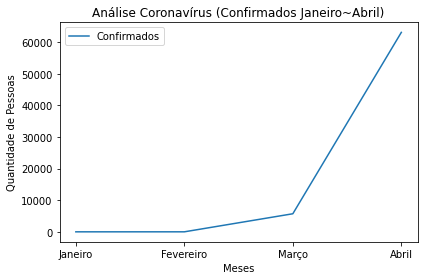

In [0]:
plt.plot(meses1, C1, label="Confirmados")
plt.matplotlib.pyplot.title('Análise Coronavírus (Confirmados Janeiro~Abril)')
plt.matplotlib.pyplot.xlabel('Meses')
plt.matplotlib.pyplot.ylabel('Quantidade de Pessoas')
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left')
plt.tight_layout()

In [0]:
C2=np.array(data.Mortos.array)

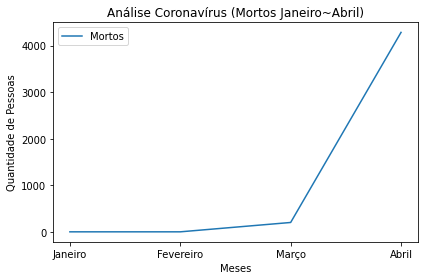

In [0]:
plt.plot(meses1, C2, label="Mortos")
plt.matplotlib.pyplot.title('Análise Coronavírus (Mortos Janeiro~Abril)')
plt.matplotlib.pyplot.xlabel('Meses')
plt.matplotlib.pyplot.ylabel('Quantidade de Pessoas')
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left')
plt.tight_layout()

In [0]:
C3=np.array(data.Recuperados.array)

array([    0,     0,   127, 30152])

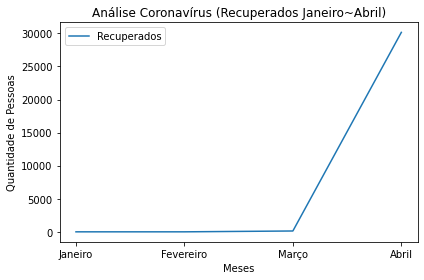

In [0]:
plt.plot(meses1, C3, label="Recuperados")
plt.matplotlib.pyplot.title('Análise Coronavírus (Recuperados Janeiro~Abril)')
plt.matplotlib.pyplot.xlabel('Meses')
plt.matplotlib.pyplot.ylabel('Quantidade de Pessoas')
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left')
plt.tight_layout()

In [0]:
x=data.Data
y=data.Confirmados
y=y.array
x=x.array

In [0]:
def getNDDCoeffs(x, y):
    "" "Cria pirâmide NDD e extrai coeficientes" ""
    n = np.shape(y)[0]
    pyramid = np.zeros([n, n]) # Crie uma matriz quadrada para segurar a pirâmide
    pyramid[::,0] = y # primeira coluna é y
    for j in range(1,n):
        for i in range(n-j):
             # create pyramid atualizando outras colunas
            pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (x[i+j] - x[i])
    return pyramid[0] # retornar primeira linha
coeff_vector = getNDDCoeffs(x, y)

In [0]:
final_pol = np.polynomial.Polynomial([0.]) #nosso polinômio de destino
n = coeff_vector.shape[0]# obtém o número de coeficientes
for i in range(n):
    p = np.polynomial.Polynomial([1.]) # cria um polinômio fictício
    for j in range(i):
         # cada vetor tem grau de i
         # seus termos dependem dos valores 'x'
        p_temp = np.polynomial.Polynomial([-x[j], 1.]) # (x - x_j)
        p = np.polymul(p, p_temp) # multiplica fictício com expressão
    p *= coeff_vector[i] # aplica coeficiente
    final_pol = np.polyadd(final_pol, p) # adicionar ao polinômio de destino
p = np.flip(final_pol[0].coef, axis=0)

In [0]:
teste1=p

In [0]:
x=data.Data
y=data.Mortos
y=y.array
x=x.array

<PandasArray>
[1, 2, 3, 4]
Length: 4, dtype: int64

In [0]:
def getNDDCoeffs(x, y):
    """ Creates NDD pyramid and extracts coeffs """
    n = np.shape(y)[0]
    pyramid = np.zeros([n, n]) 
    pyramid[::,0] = y 
    for j in range(1,n):
        for i in range(n-j):
           
            pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (x[i+j] - x[i])
    return pyramid[0] 
coeff_vector = getNDDCoeffs(x, y)

In [0]:
final_pol = np.polynomial.Polynomial([0.]) 
n = coeff_vector.shape[0] 
for i in range(n):
    p = np.polynomial.Polynomial([1.])
    for j in range(i):
        p_temp = np.polynomial.Polynomial([-x[j], 1.]) 
        p = np.polymul(p, p_temp) 
    p *= coeff_vector[i]
    final_pol = np.polyadd(final_pol, p)
p = np.flip(final_pol[0].coef, axis=0)

In [0]:
teste2=p

In [0]:
x=data.Data
y=data.Recuperados
y=y.array
x=x.array

In [0]:
def getNDDCoeffs(x, y):
    """ Creates NDD pyramid and extracts coeffs """
    n = np.shape(y)[0]
    pyramid = np.zeros([n, n]) 
    pyramid[::,0] = y 
    for j in range(1,n):
        for i in range(n-j):
           
            pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (x[i+j] - x[i])
    return pyramid[0] 
coeff_vector = getNDDCoeffs(x, y)

In [0]:
final_pol = np.polynomial.Polynomial([0.]) 
n = coeff_vector.shape[0] 
for i in range(n):
    p = np.polynomial.Polynomial([1.]) 
    for j in range(i):
        
        p_temp = np.polynomial.Polynomial([-x[j], 1.]) 
        p = np.polymul(p, p_temp) 
    p *= coeff_vector[i] 
    final_pol = np.polyadd(final_pol, p)
p = np.flip(final_pol[0].coef, axis=0)

In [0]:
teste3=p

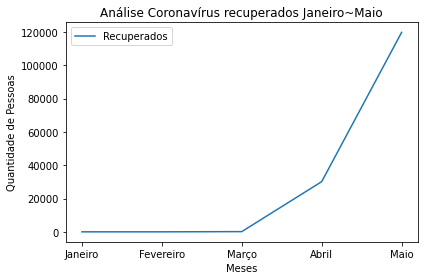

In [0]:
x_axis1 = np.linspace(1, 5,num=5,dtype=int)
y_axis1 = np.polyval(teste3, x_axis1)
plt.plot(meses, y_axis1, label="Recuperados")
plt.matplotlib.pyplot.title('Análise Coronavírus recuperados Janeiro~Maio')
plt.matplotlib.pyplot.xlabel('Meses')
plt.matplotlib.pyplot.ylabel('Quantidade de Pessoas')
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left')
plt.tight_layout()

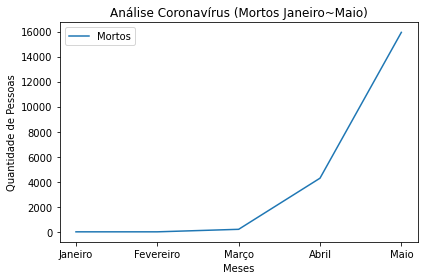

In [0]:
x_axis = np.linspace(1, 5,num=5,dtype=int)
y_axis = np.polyval(teste2, x_axis)
plt.plot(meses, y_axis, label="Mortos")
plt.matplotlib.pyplot.title('Análise Coronavírus (Mortos Janeiro~Maio)')
plt.matplotlib.pyplot.xlabel('Meses')
plt.matplotlib.pyplot.ylabel('Quantidade de Pessoas')
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left')
plt.tight_layout()

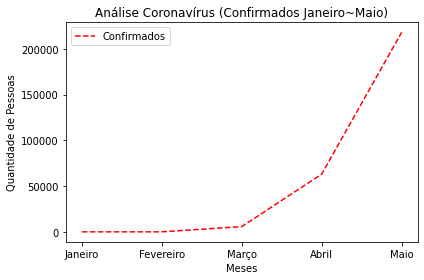

In [0]:
x_axis2 = np.linspace(1, 5,num=5,dtype=int)
y_axis2 = np.polyval(teste1, x_axis2)
plt.plot(meses, y_axis2,'r--', label="Confirmados")
plt.matplotlib.pyplot.title('Análise Coronavírus (Confirmados Janeiro~Maio)')
plt.matplotlib.pyplot.xlabel('Meses')
plt.matplotlib.pyplot.ylabel('Quantidade de Pessoas')
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left')
plt.tight_layout()

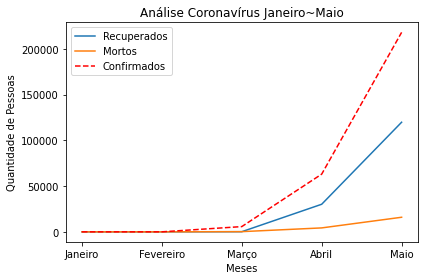

In [0]:
x_axis1 = np.linspace(1, 5,num=5,dtype=int)
y_axis1 = np.polyval(teste3, x_axis1)
plt.plot(meses, y_axis1, label="Recuperados")

x_axis = np.linspace(1, 5,num=5,dtype=int)
y_axis = np.polyval(teste2, x_axis)
plt.plot(meses, y_axis, label="Mortos")

x_axis2 = np.linspace(1, 5,num=5,dtype=int)
y_axis2 = np.polyval(teste1, x_axis2)
plt.plot(meses, y_axis2,'r--', label="Confirmados")

plt.matplotlib.pyplot.title('Análise Coronavírus Janeiro~Maio')
plt.matplotlib.pyplot.xlabel('Meses')
plt.matplotlib.pyplot.ylabel('Quantidade de Pessoas')

plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left')
plt.tight_layout()
plt.show()